In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
crypto_df = pd.read_csv("CryptocoinsHistoricalPrices.csv")

In [3]:
crypto_df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market.Cap', 'coin', 'Delta'],
      dtype='object')

In [4]:
crypto_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [5]:
#determine total number of altcoins
crypto_df["coin"].nunique()

1356

In [6]:
#filter out top 15 cryptocurrencies to analyze
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 

In [7]:
#filter the top 15 dataframe
top15 = top15[["Date", "Close", "coin"]]

In [8]:
#convert the date to datetime so we can use it in a plot 
#top15.set_index(pd.to_datetime(top15["Date"], format = "%m/%d/%y"), inplace = True) 
top15["Date"]=pd.to_datetime(top15["Date"]) #, format = "%m/%d/%y")
top15.head()

,Date,Close,coin
0,2018-01-04,15599.2,BTC
1,2018-01-03,15201.0,BTC
2,2018-01-02,14982.1,BTC
3,2018-01-01,13657.2,BTC
4,2017-12-31,14156.4,BTC


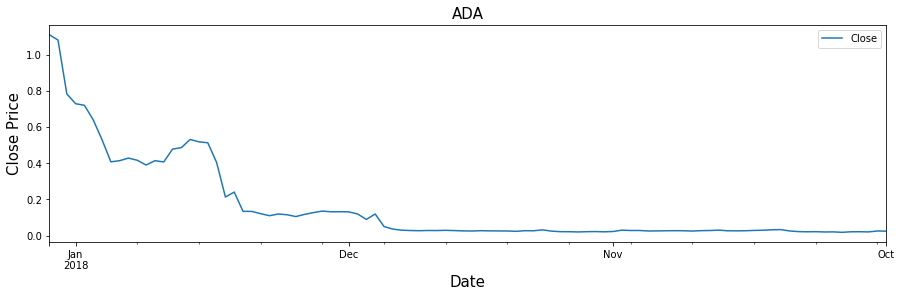

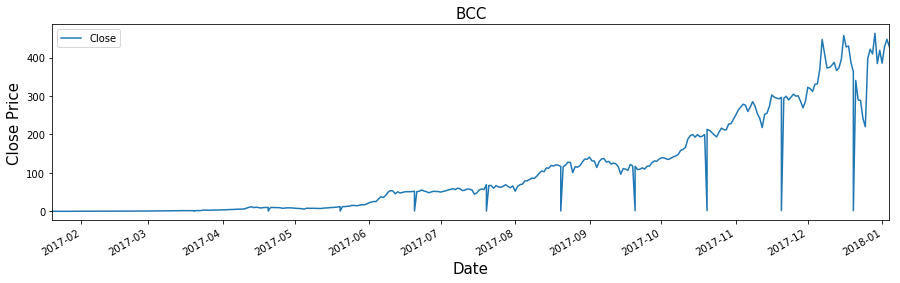

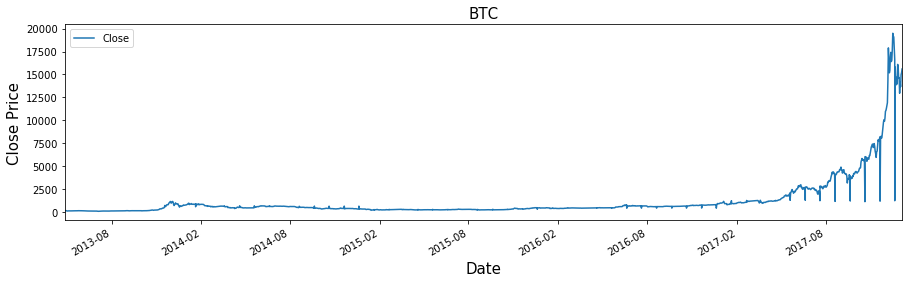

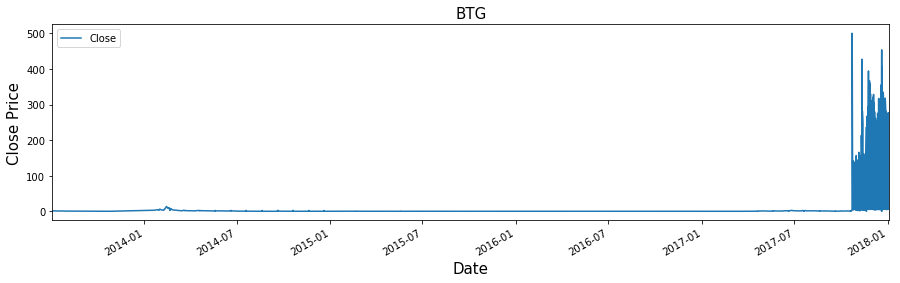

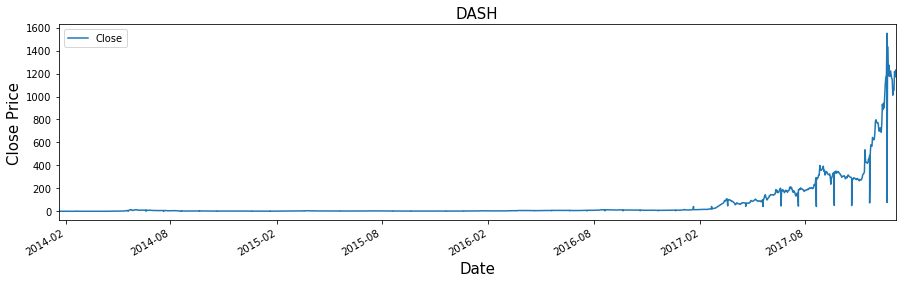

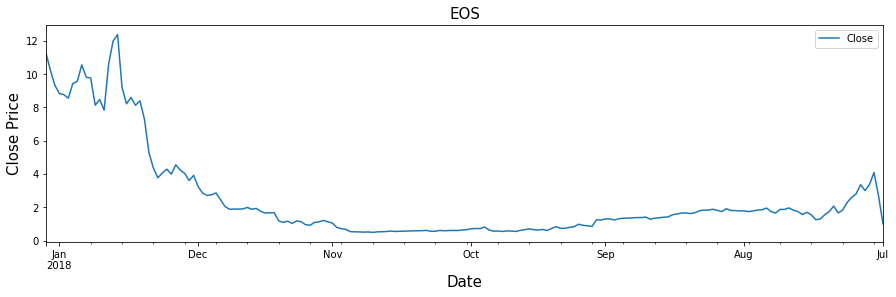

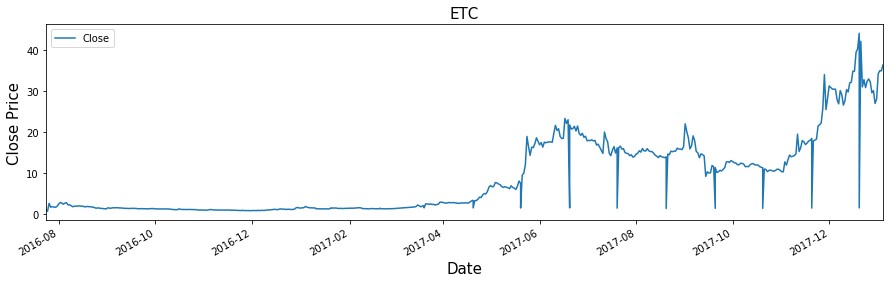

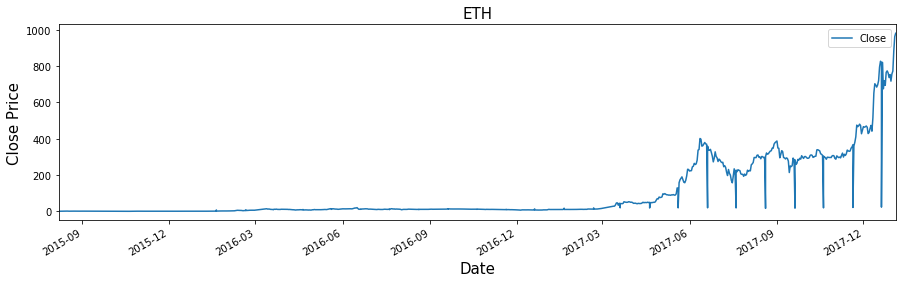

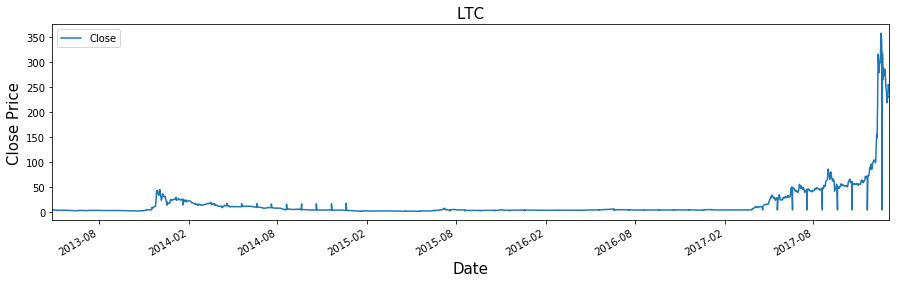

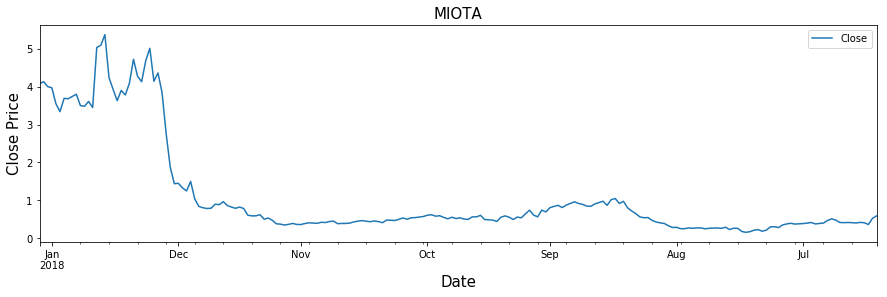

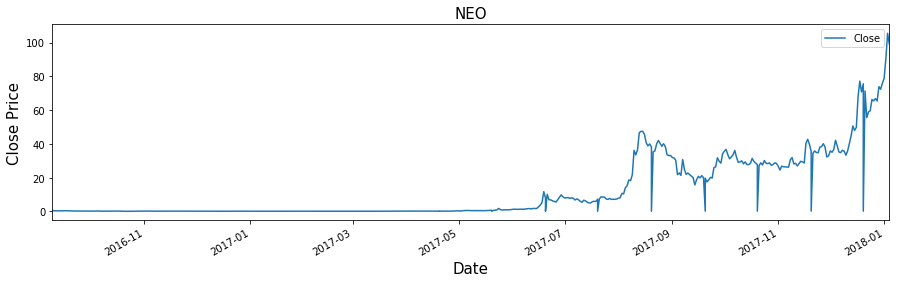

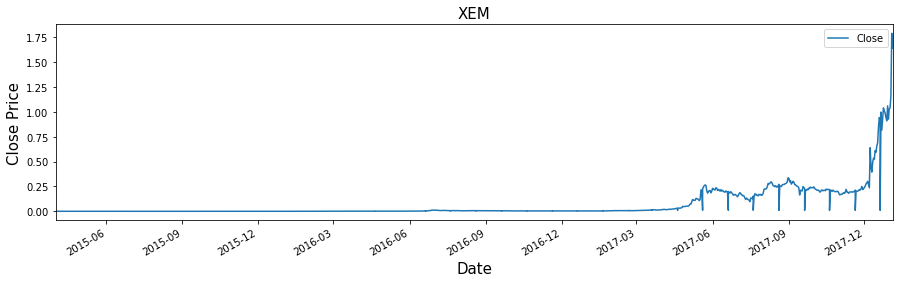

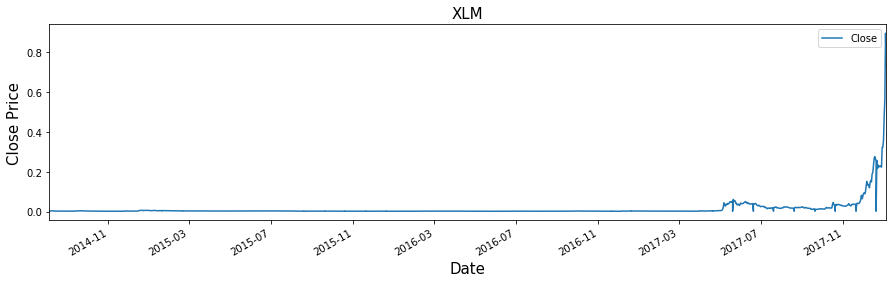

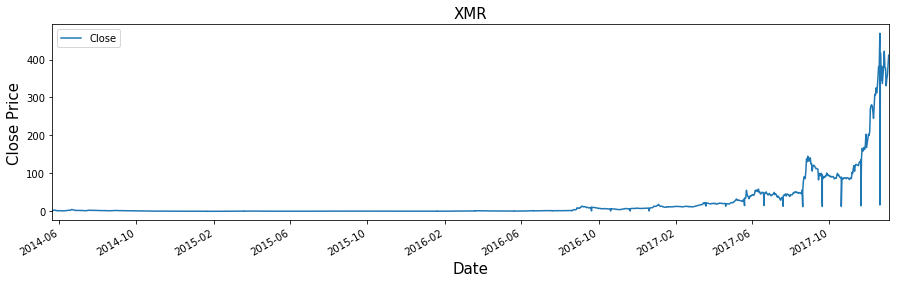

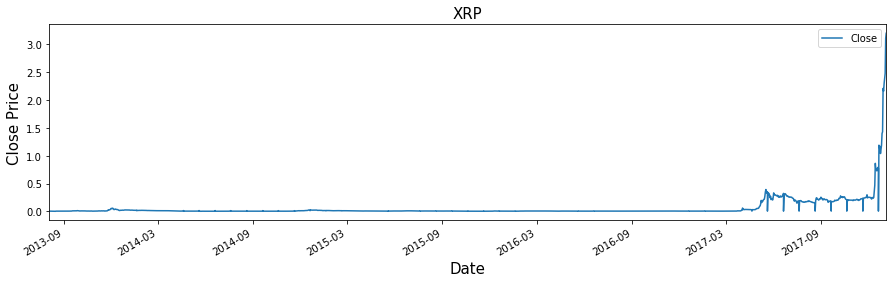

In [9]:
#plot an individual graph for historic closing price data for each of the 15 cryptocurrencies
for name, group in top15.groupby("coin"):
    group.plot(x= "Date", y= "Close", figsize=(15,4))
    plt.ylabel("Close Price", fontsize = 15)
    plt.xlabel("Date", fontsize = 15)
    plt.title(name, fontsize = 15)

In [10]:
top5 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")
                      ,:]

top10 = crypto_df.loc[(crypto_df["coin"]=="DASH")|(crypto_df["coin"]=="XEM")|
                      (crypto_df["coin"]=="XMR")|(crypto_df["coin"]=="BTG")|
                      (crypto_df["coin"]=="ETC")
                      ,:]

final_top = crypto_df.loc[(crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

In [11]:
top5 = top5[["Date", "Close", "coin"]]
top10 = top10[["Date", "Close", "coin"]]
final_top = final_top[["Date", "Close", "coin"]]

In [12]:
top5.set_index(pd.to_datetime(top5["Date"], format = "%m/%d/%y"), inplace = True) 
top5["Date"]=pd.to_datetime(top5["Date"], format = "%m/%d/%y") 
top5 = top5.reset_index(drop=True)
top10.set_index(pd.to_datetime(top10["Date"], format = "%m/%d/%y"), inplace = True) 
top10["Date"]=pd.to_datetime(top10["Date"], format = "%m/%d/%y") 
top10 = top10.reset_index(drop=True)
final_top.set_index(pd.to_datetime(final_top["Date"], format = "%m/%d/%y"), inplace = True) 
final_top["Date"]=pd.to_datetime(final_top["Date"], format = "%m/%d/%y") 
final_top = final_top.reset_index(drop=True)

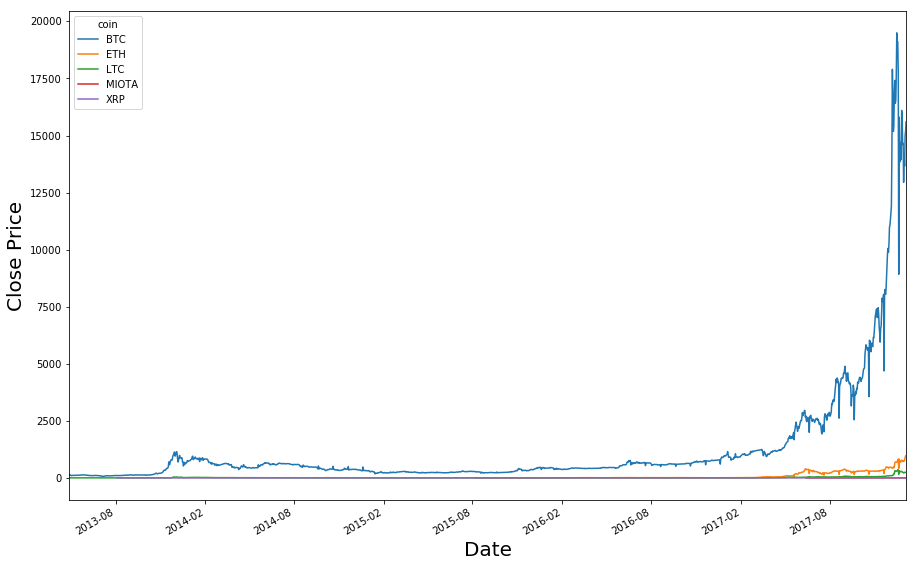

In [13]:
pd.pivot_table(top5, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

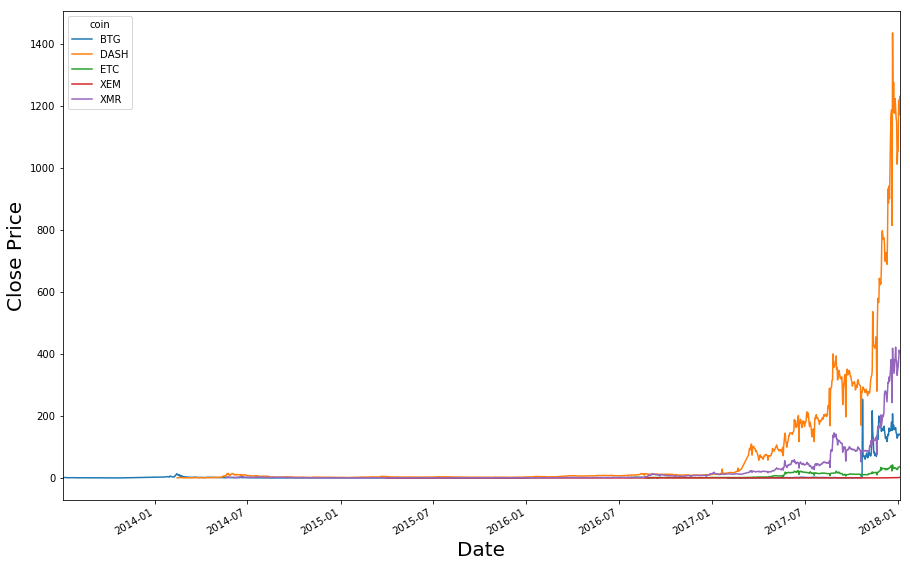

In [14]:
pd.pivot_table(top10, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

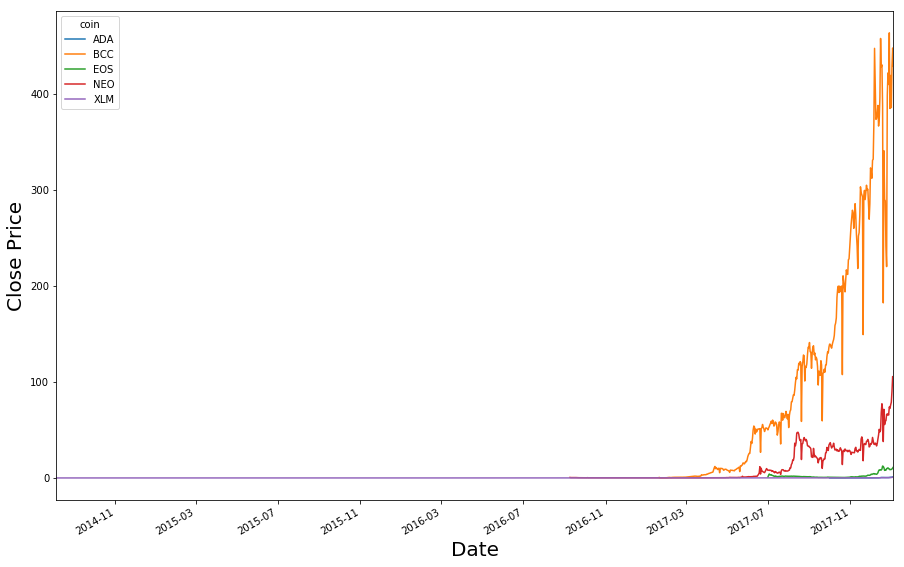

In [15]:
pd.pivot_table(final_top, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

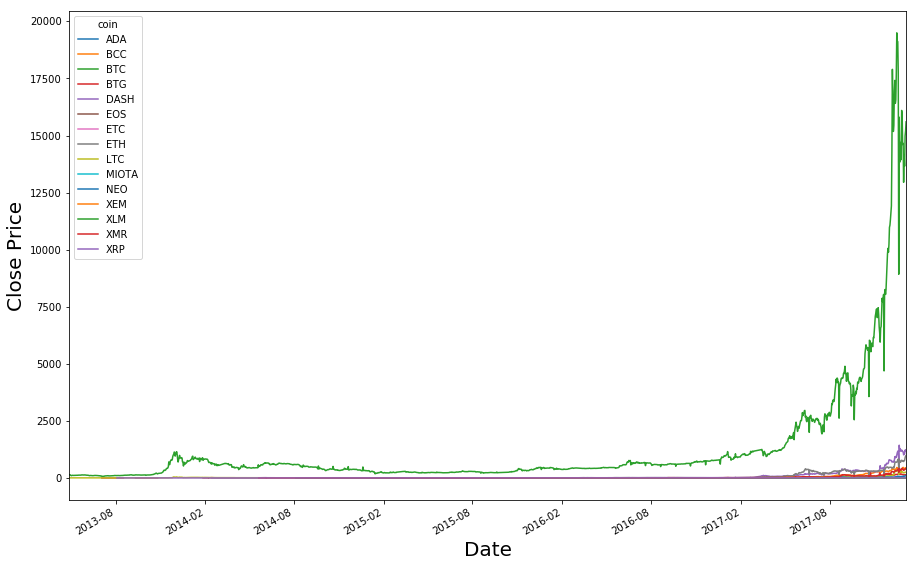

In [16]:
#Plotting all top15 coins together. All coins are trending upwards. 
#All coins experience the majority of their growth in 2017.
pd.pivot_table(top15, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

In [17]:
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 

In [18]:
top15 = top15[["Date", "Delta", "coin"]]
top15['Date'] = pd.to_datetime(top15['Date'])
top15 = top15[(top15['Date'] > '2016-12-31') & (top15['Date'] <= '2017-12-31')]  
top15.head()

,Date,Delta,coin
4,2017-12-31,0.097591,BTC
5,2017-12-30,-0.117812,BTC
6,2017-12-29,-0.002695,BTC
7,2017-12-28,-0.079273,BTC
8,2017-12-27,-0.020107,BTC


In [19]:
#st dev and average of daily return (delta)
top15.groupby("coin").agg({np.std, np.mean}) 
top15 = top15.reset_index(drop=True)
top15.head()

,Date,Delta,coin
0,2017-12-31,0.097591,BTC
1,2017-12-30,-0.117812,BTC
2,2017-12-29,-0.002695,BTC
3,2017-12-28,-0.079273,BTC
4,2017-12-27,-0.020107,BTC


In [20]:
top15p = pd.pivot_table(top15, values= "Delta", columns= "coin", index= "Date")

In [21]:
#daily price correlation among coins
top15p.corr()

coin,ADA,BCC,BTC,BTG,DASH,EOS,ETC,ETH,LTC,MIOTA,NEO,XEM,XLM,XMR,XRP
coin,,,,,,,,,,,,,,,
ADA,1.000000,0.065790,0.123704,-0.037019,0.089054,0.105495,0.487125,0.173349,0.134608,0.318203,0.240243,0.182762,0.389512,0.317083,0.400330
BCC,0.065790,1.000000,0.439203,0.038293,0.132078,0.139106,0.111576,0.215561,0.150041,0.254330,0.062389,0.045037,0.103517,0.175869,0.024825
BTC,0.123704,0.439203,1.000000,0.108284,0.314300,0.244929,0.352843,0.348671,0.371419,0.397387,0.217734,0.193813,0.224916,0.407101,0.096800
BTG,-0.037019,0.038293,0.108284,1.000000,0.053827,0.008711,0.038361,0.037626,0.035676,0.088920,0.003156,0.060850,-0.039099,0.069058,-0.035759
DASH,0.089054,0.132078,0.314300,0.053827,1.000000,0.197666,0.275416,0.367514,0.288848,0.320903,0.212122,0.233999,0.141936,0.492346,0.003891
EOS,0.105495,0.139106,0.244929,0.008711,0.197666,1.000000,0.296991,0.383945,0.276922,0.241867,0.229750,0.214853,0.214173,0.251531,0.202914
ETC,0.487125,0.111576,0.352843,0.038361,0.275416,0.296991,1.000000,0.579198,0.479347,0.478233,0.385542,0.309256,0.231934,0.371634,0.081757
ETH,0.173349,0.215561,0.348671,0.037626,0.367514,0.383945,0.579198,1.000000,0.346037,0.467343,0.255479,0.263573,0.189841,0.459477,0.105946
LTC,0.134608,0.150041,0.371419,0.035676,0.288848,0.276922,0.479347,0.346037,1.000000,0.345039,0.266628,0.306451,0.262297,0.357259,0.211280
